In [31]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
%matplotlib inline

In [ ]:
# Get bank data for time period 01-01-2006 through 01-01-2016
    # Bank of America - BAC
    # Citigroup - C
    # Goldman Sachs - GS
    # JPMorgan Chase - JPM
    # Morgan Stanley - MS
    # Wells Fargo - WFC

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [42]:
# Create bank dataframes

# Bank of America
BAC = web.DataReader('BAC','yahoo', start, end)
# Citigroup
C = web.DataReader('C','yahoo', start, end)
# Goldman Sachs
GS = web.DataReader('GS','yahoo', start,end)
# JPMorgan Chase
JPM = web.DataReader('JPM','yahoo', start,end)
# Morgan Stanley
MS = web.DataReader('MS','yahoo', start,end)
# Wells Fargo
WFC = web.DataReader('WFC','yahoo', start,end)

In [4]:
# Create tickers list

tickers = ['BAC','C','GS','JPM','MS','WFC']

In [5]:
# Create bank_stocks dataframe

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [6]:
# Set column names

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
# Round values

bank_stocks = bank_stocks.round(decimals=2)

In [8]:
# Check bank_stocks dataframe

bank_stocks.head()

Bank Ticker    BAC                                                 C         \
Stock Info    High    Low   Open  Close      Volume Adj Close   High    Low   
Date                                                                          
2006-01-03   47.18  46.15  46.92  47.08  16296700.0     33.36  493.8  481.1   
2006-01-04   47.24  46.45  47.00  46.58  17757900.0     33.01  491.0  483.5   
2006-01-05   46.83  46.32  46.58  46.64  14970700.0     33.05  487.8  484.0   
2006-01-06   46.91  46.35  46.80  46.57  12599800.0     33.00  489.0  482.0   
2006-01-09   46.97  46.36  46.72  46.60  15619400.0     33.02  487.4  483.0   

Bank Ticker                ...     MS                                WFC  \
Stock Info    Open  Close  ...   Open  Close     Volume Adj Close   High   
Date                       ...                                             
2006-01-03   490.0  492.9  ...  57.17  58.31  5377000.0     34.89  31.98   
2006-01-04   488.6  483.8  ...  58.70  58.35  7977800.0     34.91  31.82   
2006-01-05   484.4  486.2  ...  58.55  58.51  5778000.0     35.01  31.56   
2006-01-06   488.8  486.2  ...  58.77  58.57  6889800.0     35.04  31.77   
2006-01-09   486.0  483.9  ...  58.63  59.19  4144500.0     35.41  31.83   

Bank Ticker                                             
Stock Info     Low   Open  Close      Volume Adj Close  
Date                                                    
2006-01-03   31.19  31.60  31.90  11016400.0     20.10  
2006-01-04   31.36  31.80  31.53  10870000.0     19.87  
2006-01-05   31.31  31.50  31.50  10158000.0     19.85  
2006-01-06   31.39  31.58  31.68   8403800.0     19.97  
2006-01-09   31.56  31.67  31.67   5619600.0     19.96  

[5 rows x 36 columns]

In [9]:
# Max close price for each bank during time period

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [10]:
# Create empty dataframe 'returns'

returns = pd.DataFrame()

In [11]:
# Fill 'returns' dataframe

for tick in tickers:
    returns [tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


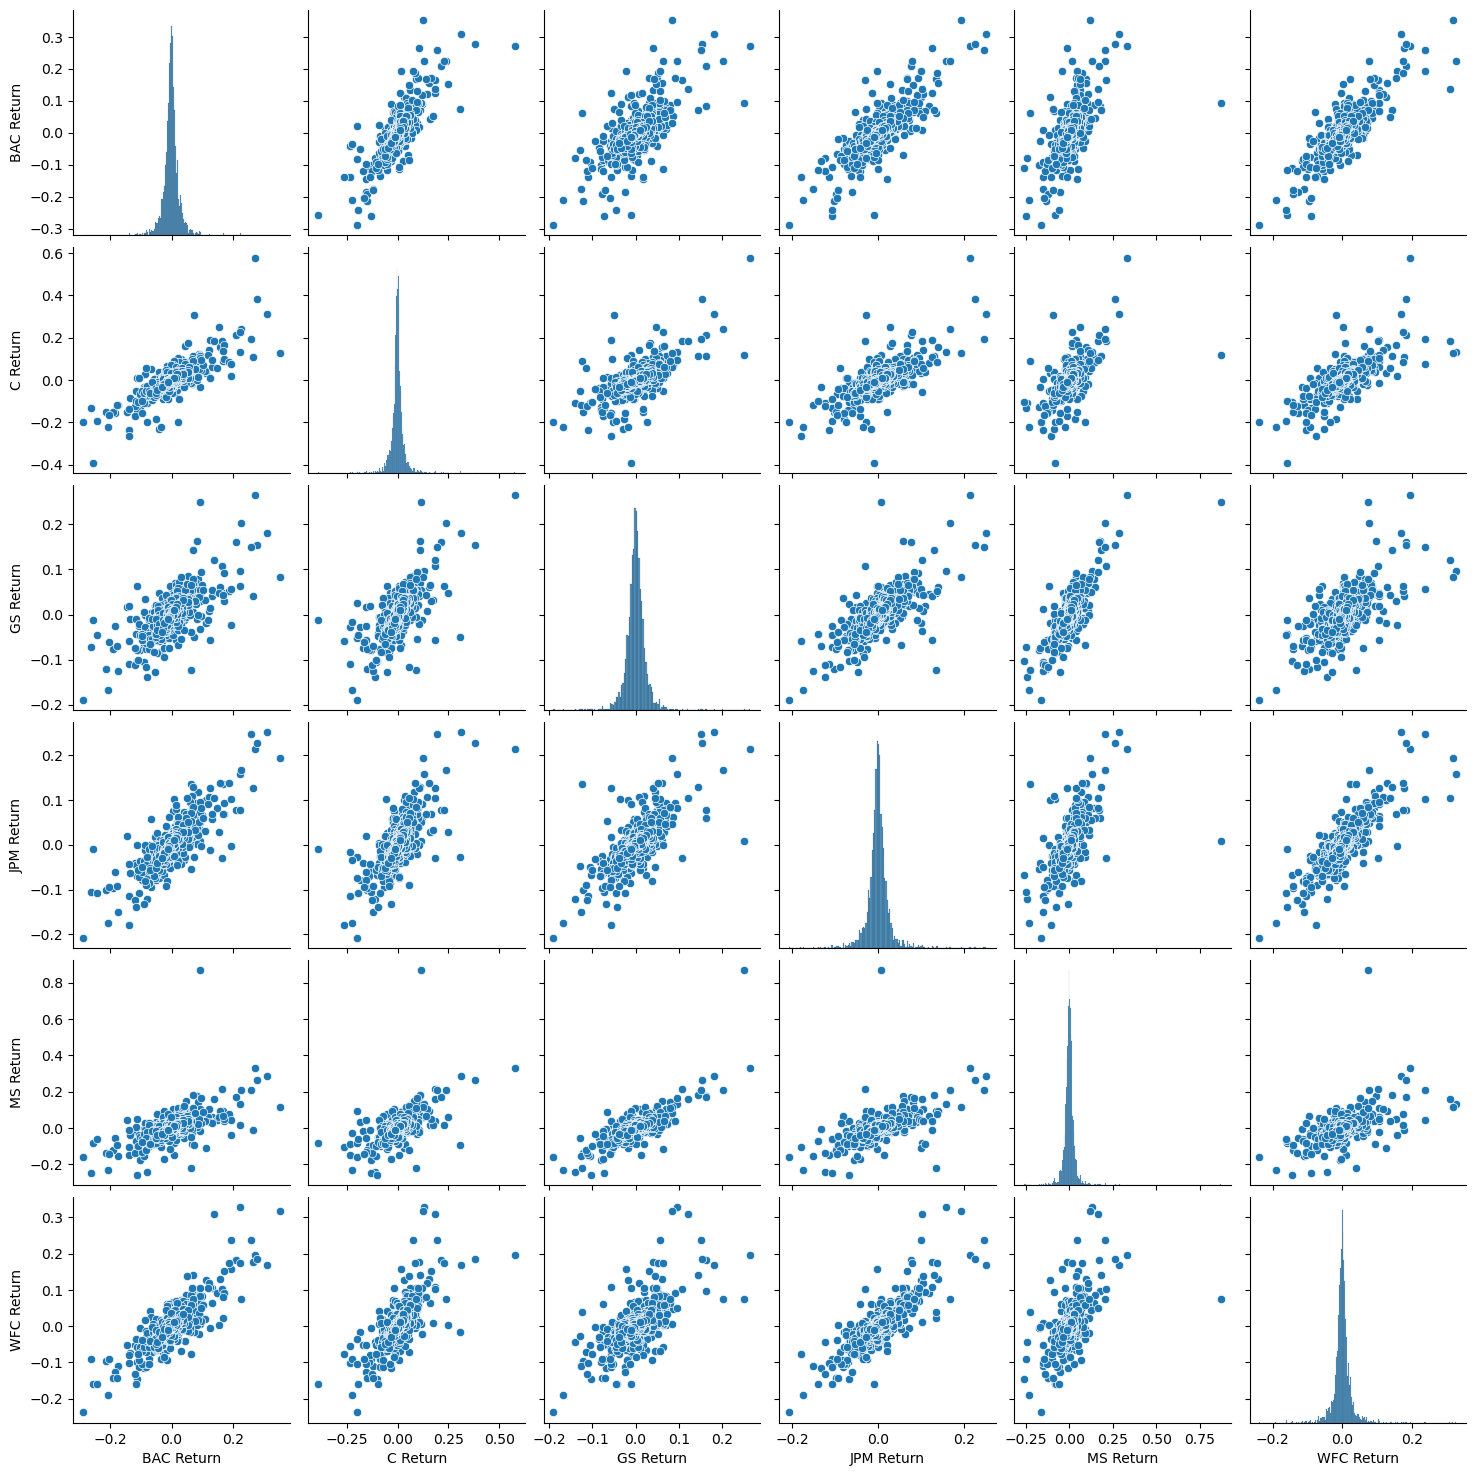

In [13]:
# returns Pairplot

pairplot = sns.pairplot(returns[1:])

In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


In [16]:
# Worst single day return

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
# Best single day return

returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [18]:
# standard deviation over entire time period
# shows that Citigroup is a slightly riskier investment than the others

returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [22]:
# standard deviation for 2015
# pretty similar riskiness

returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

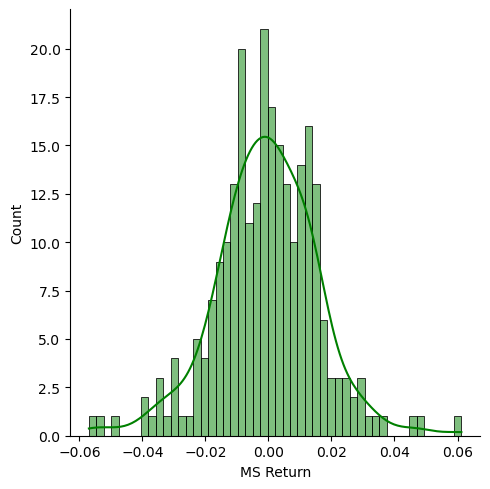

In [27]:
# distribution plot for Morgan Stanley in 2015
# pretty stable

sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],
            color='green',
           bins=50,
           kde=True)

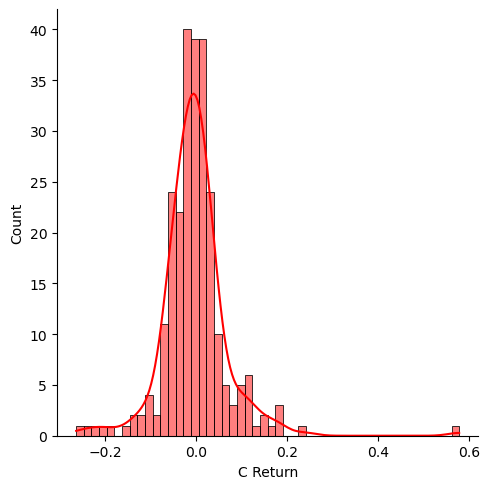

In [30]:
# distribution plot for Citigroup in 2008
# large standard deviation - indicating stock volatility

sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],
           color = 'red',
            bins = 50,
           kde = True)

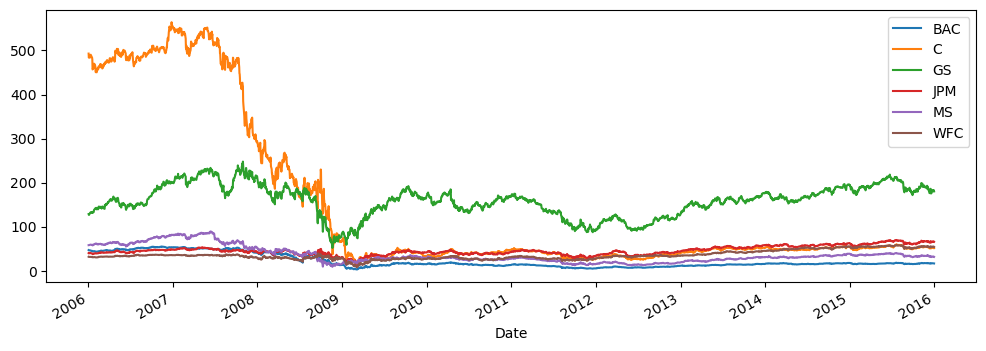

In [32]:
# Close price for each bank over entire time period
# for loop method

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

# note huge crash 2008-2009 in Citigroup stock, and other crash but quick rebound in Goldman Sachs stock 
# other bank stocks experienced smaller crashes and rallies as GS in that same time period

<AxesSubplot:xlabel='Date'>

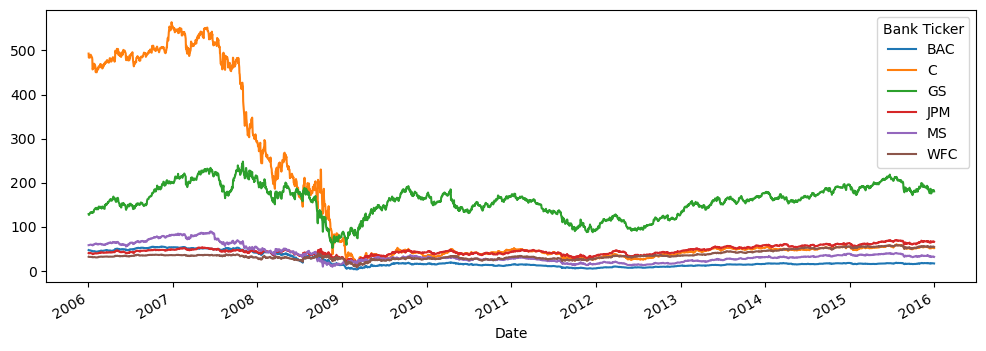

In [35]:
# .xs method for same line chart above

bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [38]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [39]:
# iplot method

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

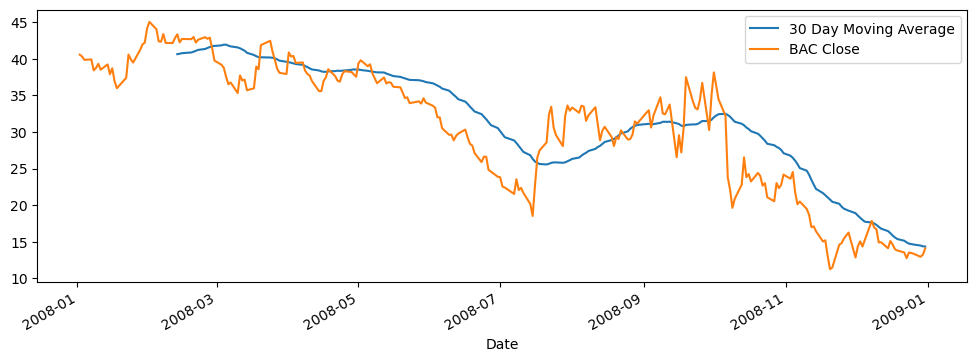

In [46]:
# Rolling 30 day average for Bank of America in 2008

plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008'].rolling(window=30).mean().plot(label='30 Day Moving Average')
bank_stocks['BAC']['Close'].loc['2008'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

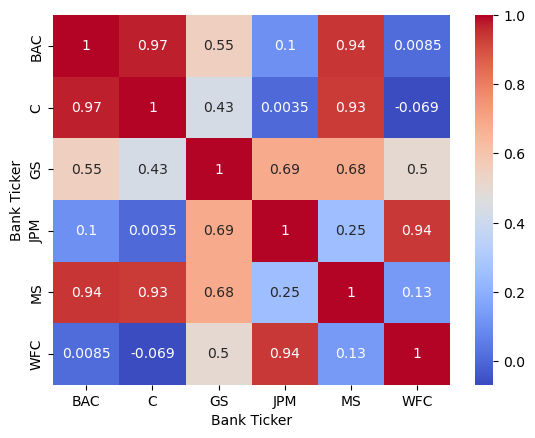

In [52]:
# Heatmap of Closing Price correlation

sns.heatmap(bank_stocks.xs(key='Close',
                           axis=1,
                           level='Stock Info').corr(),
                           cmap='coolwarm',
                           annot=True)

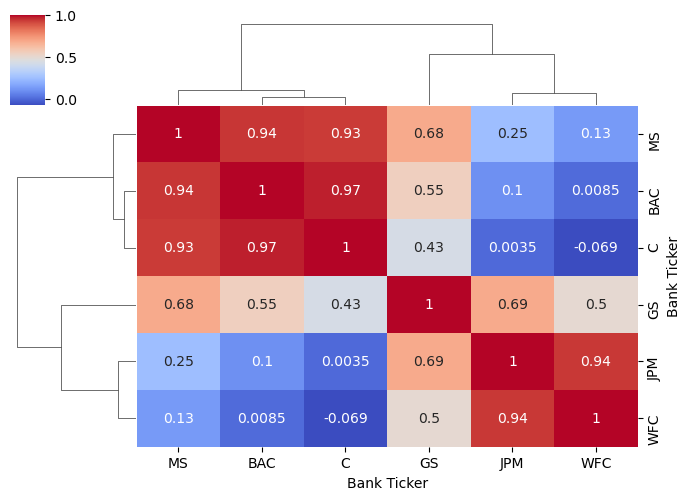

In [57]:
# Clustermap of Closing Price Correlation

sns.clustermap(bank_stocks.xs(key='Close',
                           axis=1,
                           level='Stock Info').corr(),
                           cmap='coolwarm',
                           annot=True,
                            figsize=(7,5))

In [62]:
# iplot heatmap of Closing Price Correlation

close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [63]:
# Candleplot for Bank of America in 2015

bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

In [65]:
# Simple Moving Averages for Morgan Stanley in 2015

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [66]:
# Bollinger Band Plot for Bank of America in 2015

BAC['Close'].loc['2015-01-1':'2016-01-01'].ta_plot(study='boll')